## Chapter 3 basic image filtering operations
1. Box filter
2. Gaussian filter
3. Median filter
4. Bilateral filter

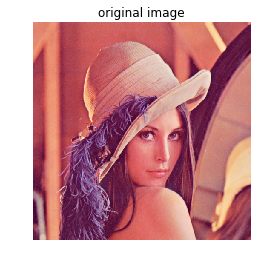

In [5]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('./test_data/lenna.png')
plt.imshow(image[:,:,[2,1,0]])
plt.title('original image')
plt.axis('off')
plt.show()

### Box filtering

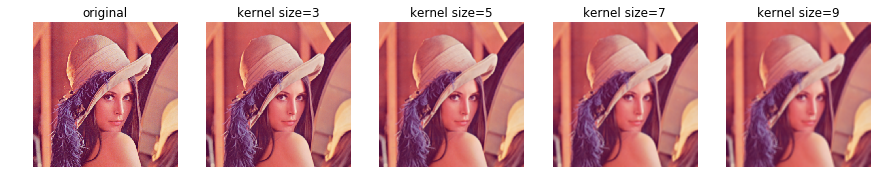

In [23]:
plt.figure(figsize=(15,3))
plt.subplot(1,5,1)
plt.title('original')
plt.axis('off')
plt.imshow(image[:,:,[2,1,0]])
for i, k in enumerate([3,5,7,9]):
    result = cv2.blur(image,(k,k))
    plt.subplot(1,5,i+2)
    plt.title('kernel size='+str(k))
    plt.axis('off')
    plt.imshow(result[:,:,[2,1,0]])
plt.show()

### Gaussian filtering

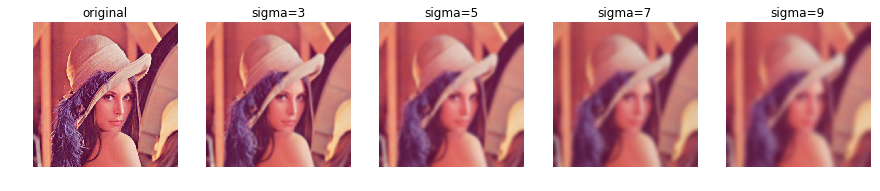

In [22]:
plt.figure(figsize=(15,3))
plt.subplot(1,5,1)
plt.title('original')
plt.axis('off')
plt.imshow(image[:,:,[2,1,0]])
for i, sigma in enumerate([3,5,7,9]):
    result = cv2.GaussianBlur(image,(0,0),sigma) # (0,0) means that the kernel size is determined by sigma_x and sigma_y.
    plt.subplot(1,5,i+2)
    plt.title('sigma='+str(sigma))
    plt.axis('off')
    plt.imshow(result[:,:,[2,1,0]])
plt.show()

### Median filtering

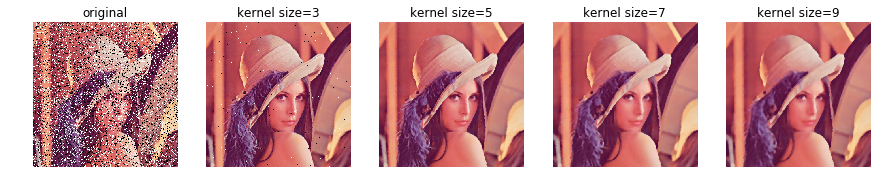

In [30]:
import numpy as np
noise = np.random.randint(0,80,image.shape[0:2])
noise1= np.nonzero(noise >= 70)
noise0= np.nonzero(noise <  10)
image_salt_and_pepper = image.copy()
image_salt_and_pepper[noise1[0],noise1[1],:] = (255,255,255)
image_salt_and_pepper[noise0[0],noise0[1],:] = (0,0,0)
plt.figure(figsize=(15,3))
plt.subplot(1,5,1)
plt.title('original')
plt.axis('off')
plt.imshow(image_salt_and_pepper[:,:,[2,1,0]])
for i, k in enumerate([3,5,7,9]):
    result = cv2.medianBlur(image_salt_and_pepper,k) # (0,0) means that the kernel size is determined by sigma_x and sigma_y.
    plt.subplot(1,5,i+2)
    plt.title('kernel size='+str(k))
    plt.axis('off')
    plt.imshow(result[:,:,[2,1,0]])
plt.show()

### Bilateral filtering

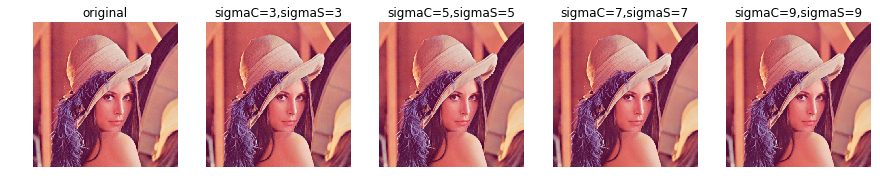

In [33]:
plt.figure(figsize=(15,3))
plt.subplot(1,5,1)
plt.title('original')
plt.axis('off')
plt.imshow(image[:,:,[2,1,0]])
for i, (sigmaColor,sigmaSpace) in enumerate(zip([3,5,7,9],[3,5,7,9])):
    result = cv2.bilateralFilter(image,-1,sigmaColor,sigmaSpace) #d=-1, kernel size is determined by sigmaSpace
    plt.subplot(1,5,i+2)
    plt.title('sigmaC='+str(sigmaColor)+',sigmaS='+str(sigmaSpace))
    plt.axis('off')
    plt.imshow(result[:,:,[2,1,0]])
plt.show()